In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [265]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from keras.optimizers import RMSprop, SGD
from keras.constraints import maxnorm

# ANN for character classification

Preparing a dataset.

In [202]:
data_set = np.loadtxt('pixel_data.csv', delimiter=',', dtype=np.uint8)

In [260]:
np.random.shuffle(data_set)
Y = data_set[:,:1].astype('uint8')
X = data_set[:,1:].reshape(X.shape[0],3,30,30)

In [261]:
trainset_num = int(len(X) * 0.7) # classical split 70/30

X_train = X[:trainset_num]
X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X[trainset_num:]
X_test = X_test.astype('float32')
X_test = X_test/255

In [262]:
classes_num = 2

Y_train = Y[:trainset_num]
Y_train = to_categorical(Y_train, classes_num)

Y_test = Y[trainset_num:]
Y_test = to_categorical(Y_test, classes_num)

Displaying some examples. 0-class is image with letter or digit and 1-class is image with something else.

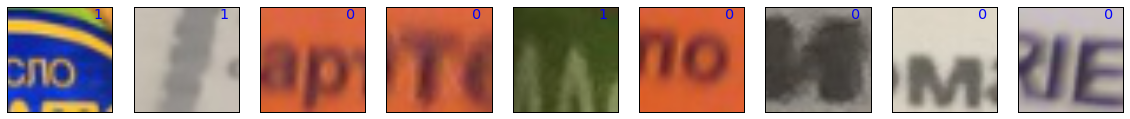

In [263]:
images_n_to_display = 9
sample_images = X_train[:images_n_to_display].reshape((images_n_to_display,30,30,3))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.bwr)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,np.argmax(Y_train[i]), color='blue', size='x-large')

## Fully connected feedforward neural network

In [278]:
# ff_model = Sequential()

# input_units_num = 2700
# hidden_1_units_num = 125 
# hidden_2_units_num = 125
# out_units_num = 2

model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(3, 30, 30), border_mode='same', activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same', W_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', W_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [279]:
model.fit(X_train, Y_train, validation_split=0.2, batch_size=32, nb_epoch=epochs)

Train on 1097 samples, validate on 275 samples
Epoch 1/25
1097/1097 [==============================] - 14s - loss: 0.6908 - acc: 0.5187 - val_loss: 0.6993 - val_acc: 0.4364
Epoch 2/25
1097/1097 [==============================] - 13s - loss: 0.6831 - acc: 0.5634 - val_loss: 0.7290 - val_acc: 0.4364
Epoch 3/25
1097/1097 [==============================] - 13s - loss: 0.6685 - acc: 0.6080 - val_loss: 0.6487 - val_acc: 0.6255
Epoch 4/25
1097/1097 [==============================] - 17s - loss: 0.5428 - acc: 0.7703 - val_loss: 0.8499 - val_acc: 0.4800
Epoch 5/25
1097/1097 [==============================] - 15s - loss: 0.6791 - acc: 0.6080 - val_loss: 0.5658 - val_acc: 0.7782
Epoch 6/25
1097/1097 [==============================] - 14s - loss: 0.5252 - acc: 0.7593 - val_loss: 0.5478 - val_acc: 0.7309
Epoch 7/25
1097/1097 [==============================] - 14s - loss: 0.5107 - acc: 0.7648 - val_loss: 0.4177 - val_acc: 0.8327
Epoch 8/25
1097/1097 [==============================] - 17s - loss: 0.4